# ET Demand Test problem for Ag Package

#### Based on Sagehen example problem, model is run outside of notebook

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
import numpy as np
import pandas as pd
import datetime
from Figures import ReportFigures
from matplotlib import cm
from arcpy import env
from datetime import date
from datetime import timedelta
from dateutil.parser import parse
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

In [2]:
rf = ReportFigures()
rf.set_style()
sys.path.append('..')
python_exe = sys.executable

### Plot high and low monthly Kc vlaues

In [3]:
#open irrigation segment file again to read lines
fname1 = open(r"..\input\prms\jh_coef_month_high.in","r")
fname2 = open(r"..\input\prms\jh_coef_month_low.in","r")

Kc_high, Kc_low = [], []
    
# Read Kc values
lines1=fname1.readlines()
lines2=fname2.readlines()

# set high Kc values
i=-1
for line in lines1:
    i=i+1
    Kc_high.append(line.split()[1])
fname1.close()
# set low Kc values
i=-1
for line in lines2:
    i=i+1
    Kc_low.append(line.split()[1])
# close irrigation segment file
fname2.close()

C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Univers 57 Condensed'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Univers 67 Condensed'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


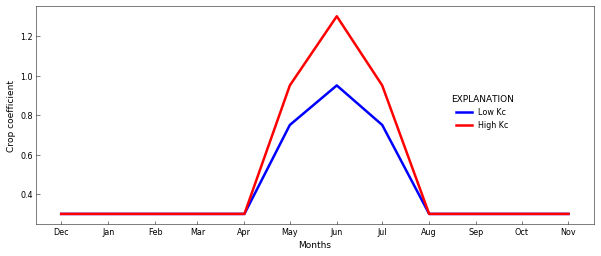

In [4]:
# set list of months
nummonths = 12
date_list = list()
for i in range(0, nummonths):
    date_list.append(datetime.date(1990, 12, 1)+relativedelta(months=i))

# plot Kc values
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
#fig, ax = plt.subplots()
x = plt.gca().xaxis
x.set_major_locator(locator)
# Specify formatter
x.set_major_formatter(fmt)
# Low Kc
ax.plot(date_list,Kc_low,color='b', linewidth=2.5, label='Low Kc')
# High Kc
ax.plot(date_list,Kc_high,color='r', linewidth=2.5, label='High Kc')
ax.set_ylabel('Crop coefficient')
ax.set_xlabel('Months')
handles, labels = ax.get_legend_handles_labels()
rf.legend(ax, handles, labels, bbox_to_anchor=(.8, 0.4))
plt.savefig('Hi_Low_Kc.pdf')

### Get size of gage files and set start and end dates for plotting

In [5]:
# calculate number of lines in file can be any gage file
num_lines = 0
with open(r"..\output_GSFLOW_only\modflow\sagehensfr24_HighKc.out", 'r') as f:
    for line in f:
        num_lines += 1

# set dates for daily values; this date is simulation starte date
dates = []
for i in range(num_lines-1): 
    dates.append(datetime.date(1990, 10, 1)+datetime.timedelta(days=i))
    
# set start and end dates for plot 
startdate, enddate, plotdates = [], [], []
startdate.append(datetime.date(1991, 3, 1))
enddate.append(datetime.date(1994, 3, 1))

### Read and process the Ag diversion segment gage file for high Kc

In [6]:

#open irrigation segment file again to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfr24_HighKc.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfr25_HighKc.out","r")
#set firstline for headers
firstline=fname1.readline()
# store all data from file in lines
lines1=fname1.readlines()
lines2=fname2.readlines()
y1_high_24, y2_high_24, y3_high_24, y4_high_24 = [], [], [], []
y1_high_25, y2_high_25, y3_high_25, y4_high_25 = [], [], [], []
y1_high_24_cum, y2_high_24_cum = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        plotdates.append(dates[i])   #only once here
#        x.append(line.split()[0])
        y1_high_24.append(line.split()[4])
        y2_high_24.append(line.split()[5])
        y3_high_24.append(line.split()[6])
#
i=-1
for line in lines2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
#        x.append(line.split()[0])
        y1_high_25.append(line.split()[4])
        y2_high_25.append(line.split()[5])
        y3_high_25.append(line.split()[6])
# close irrigation segment file
fname1.close()
fname2.close()

# sum segments
x1=np.array(y1_high_24,dtype=float)
# divide by irrigated area
x1=x1/1.134e5
x2=np.array(y1_high_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y1_high_24=x1
y1_high_24_cum=x1.cumsum()

x1=np.array(y2_high_24,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y2_high_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y2_high_24=x1

x1=np.array(y3_high_24,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y3_high_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y3_high_24=x1

# now sum SW+GW
x1=np.array(y2_high_24,dtype=float)
x2=np.array(y3_high_24,dtype=float)
x1=x1+x2
y4_high_24=x1
y4_high_24_cum=x1.cumsum()

#print out average annual NIWR in hectare-meters per hectare
print(y1_high_24_cum[len(y1_high_24_cum)-1]/3)
print(y4_high_24_cum[len(y4_high_24_cum)-1]/3)



41.9099997468
0.744033188197


In [7]:
header=[]
# set headers for plot legend
header.append(firstline.split()[0])
header.append(firstline.split()[1])
header.append(firstline.split()[2])
header.append(firstline.split()[3])
header.append(firstline.split()[4])
header.append(firstline.split()[5])
header.append(firstline.split()[6])

### Read and process the Ag diversion segment gage file for low Kc value

In [8]:
#open irrigation segment file again to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfr24_LowKc.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfr25_LowKc.out","r")
#set firstline for headers
firstline=fname1.readline()
# store all data from file in lines
lines1=fname1.readlines()
lines2=fname2.readlines()
y1_low_24, y2_low_24, y3_low_24, y4_low_24 = [], [], [], []
y1_low_25, y2_low_25, y3_low_25, y4_low_25 = [], [], [], []
y1_low_24_cum, y4_low_24_cum = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
 #       plotdates.append(dates[i])
 #       x.append(line.split()[0])
        y1_low_24.append(line.split()[4])
        y2_low_24.append(line.split()[5])
        y3_low_24.append(line.split()[6])
 #
i=-1
for line in lines2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
 #       plotdates.append(dates[i])
 #       x.append(line.split()[0])
        y1_low_25.append(line.split()[4])
        y2_low_25.append(line.split()[5])
        y3_low_25.append(line.split()[6])

# sum segments
x1=np.array(y1_low_24,dtype=float)
# convert to meters by dividing by irrigated area
x1=x1/1.134e5
x2=np.array(y1_low_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y1_low_24=x1
y1_low_24_cum=x1.cumsum()

# sum segments
x1=np.array(y2_low_24,dtype=float)
# convert to meters by dividing by irrigated area
x1=x1/1.134e5
x2=np.array(y2_low_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y2_low_24=x1

# sum segments
x1=np.array(y3_low_24,dtype=float)
# convert to meters by dividing by irrigated area
x1=x1/1.134e5
x2=np.array(y3_low_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y3_low_24=x1

# now sum SW+GW
x1=np.array(y2_low_24,dtype=float)
x2=np.array(y3_low_24,dtype=float)
x1=x1+x2
y4_low_24=x1
y4_low_24_cum=x1.cumsum()

# close irrigation segment files
fname1.close()
fname2.close()

#print out average annual NIWR
print(y1_low_24_cum[len(y1_low_24_cum)-1]/3)
print(y4_low_24_cum[len(y4_low_24_cum)-1]/3)

41.9099997468
0.512115676863


### Read and process the Ag  segment ET gage file for High Kc value

In [9]:
#open SW ET file to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfret24_HighKc.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfret25_HighKc.out","r")
#set firstline for headers
firstlineet=fname1.readline()
# set headers for plot legend
header2=[]
header2.append(firstlineet.split()[0])
header2.append(firstlineet.split()[1])
header2.append(firstlineet.split()[2])
header2.append(firstlineet.split()[3])
header2.append(firstlineet.split()[4])
header2.append(firstlineet.split()[5])
header2.append(firstlineet.split()[6])
# store all data from file in lines
lineset1=fname1.readlines()
lineset2=fname2.readlines()
y1et_high_24, y2et_high_24, y3et_high_24 = [], [], []
y1et_high_25, y2et_high_25, y3et_high_25 = [], [], []
y1et_high_24_cum, y2et_high_24_cum = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_high_24.append(line.split()[4])
        y2et_high_24.append(line.split()[5])
#
i=-1
for line in lineset2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_high_25.append(line.split()[4])
        y2et_high_25.append(line.split()[5])
        
# sum segments
x1=np.array(y1et_high_24,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y1et_high_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y1et_high_24=x1
y1et_high_24_cum=x1.cumsum()

x1=np.array(y2et_high_24,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y2et_high_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y2et_high_24=x1
y2et_high_24_cum=x1.cumsum()

# close SW ET file
fname1.close()
fname2.close()

#print out average annual ET
print(y1et_high_24_cum[len(y1et_high_24_cum)-1]/3)
print(y2et_high_24_cum[len(y2et_high_24_cum)-1]/3)

0.752719841054
0.75251206844


### Read and process the Ag  segment ET gage file for Low Kc value

In [10]:
#open SW ET file to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfret24_LowKc.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfret25_LowKc.out","r")
#set firstline for headers
firstlineet=fname1.readline()
# store all data from file in lines
lineset1=fname1.readlines()
lineset2=fname2.readlines()
y1et_low_24, y2et_low_24, y3et_low_24 = [], [], []
y1et_low_25, y2et_low_25, y3et_low_25 = [], [], []
y1et_low_24, y2et_low_24 = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_low_24.append(line.split()[4])
        y2et_low_24.append(line.split()[5])
#
i=-1
for line in lineset2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_low_25.append(line.split()[4])
        y2et_low_25.append(line.split()[5])
        
# sum segments
x1=np.array(y1et_low_24,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y1et_low_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y1et_low_24=x1
y1et_low_24_cum=x1.cumsum()

x1=np.array(y2et_low_24,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y2et_low_25,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y2et_low_24=x1
y2et_low_24_cum=x1.cumsum()

# close SW ET file
fname1.close()
fname2.close()

#print out average annual NIWR
print(y1et_low_24_cum[len(y2et_low_24_cum)-1]/3)
print(y2et_low_24_cum[len(y2et_low_24_cum)-1]/3)

0.573576504597
0.573538230217


### Plot SW plus GW irrigation water for Low and High Kc values

C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


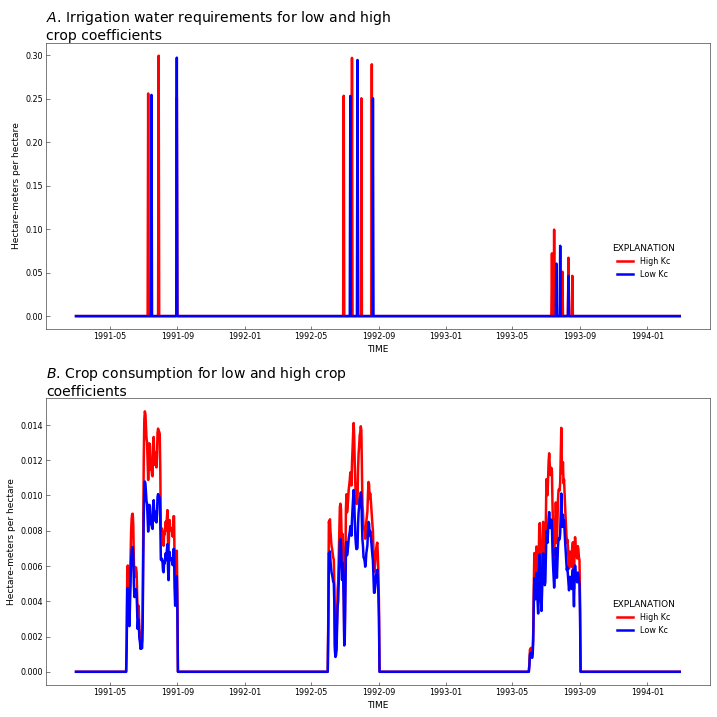

In [11]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 14

fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis = axis.flat

axis[0].plot(plotdates,y4_high_24,color='r', linewidth=2.5, label="High Kc")
axis[0].plot(plotdates,y4_low_24,color='b', linewidth=2.5, label="Low Kc")

axis[1].plot(plotdates,y2et_high_24,color='r', linewidth=2.5, label="High Kc")
axis[1].plot(plotdates,y2et_low_24,color='b', linewidth=2.5, label="Low Kc")

axis[0].set_ylabel('Hectare-meters per hectare')
axis[0].set_xlabel(header[0])


plt.ylabel('Hectare-meters per hectare')
plt.xlabel(header[0])

start, end = axis[0].get_xlim()
#axis[0].xaxis.set_ticks(np.arange(start, end, 90.0))

rf.title(axis[0], 'Irrigation water requirements for low and high crop coefficients', subplot_prefix='A')

#rf.axis_numbering(axis[1], format_x=True)
fmt = mdates.DateFormatter('%Y-%m-%d')
rf.title(axis[1], 'Crop consumption for low and high crop coefficients', subplot_prefix='B')

# Set legend
handles, labels = axis[0].get_legend_handles_labels()
rf.legend(axis[0], handles, labels, bbox_to_anchor=(.9, 0.15))

# Set legend
handles, labels = axis[1].get_legend_handles_labels()
rf.legend(axis[1], handles, labels, bbox_to_anchor=(.9, 0.15))

plt.tight_layout()
plt.savefig('WR_Kccomp.pdf')